# Analyse van 1 variabele

De meeste Python scripts (of Jupyter Notebooks) voor het analyseren van data maken gebruik van dezelfde programmabibliotheken. De belangrijkste zijn:

- `numpy` - multidimensionale arrays, lineaire algebra, enz.
- `scipy` - wiskunde, (ingenieurs)wetenschappen, enz.
- `pandas` - data-analyse en -manipulatie
- `matplotlib`, `seaborn`, `altair` - datavisualisatie.

Je zet deze dus best bovenaan elk script dat je schrijft. In veel scripts is het de conventie om de packagenamen af te korten, bv. `np` voor `numpy`, `sns` voor `seaborn`, enz.

In [6]:
# Importeren van de nodige packages
import numpy as np                                  # "Scientific computing"
import scipy.stats as stats                         # Statistical tests

import pandas as pd                                 # Dataframe
import matplotlib.pyplot as plt                     # Basis visualisatie
from statsmodels.graphics.mosaicplot import mosaic  # Mozaïekdiagram
import seaborn as sns                               # Geavanceerde datavisualisatie
import altair as alt                                # Een alternatief visualisatiesysteem

In Seaborn zitten enkele datasets die we hier zullen gebruiken als voorbeelden.

In [7]:
# Voorbeeld-datasets, meegeleverd met Seaborn
mpg = sns.load_dataset("mpg")      # Eigenschappen van auto's
tips = sns.load_dataset("tips")    # Info over fooien bij restaurantbezoek

We tonen hier de eerste rijen van deze datasets om een idee te krijgen van de inhoud:

In [9]:
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [10]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## Kwalitatieve variabelen

### Visualisatie met staafgrafiek

Er bestaan verschillende Python-libraries om data te visualiseren. We tonen hier hoe je een staafgrafiek kan opstellen enerzijds in Seaborn, en anderzijds in Altair.

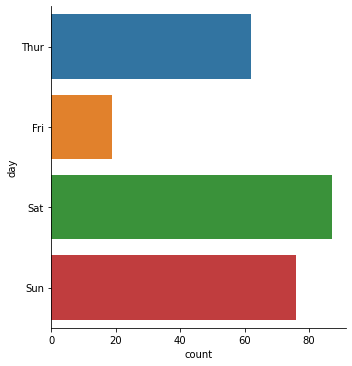

In [11]:
# Staafgrafiek in Seaborn: catplot()
sns.catplot(data = tips, kind = "count", y = "day")

In [12]:
# Staafgrafiek met Altair: mark_bar()
alt.Chart(tips).mark_bar().encode(
    x=alt.X("count()",
            axis=alt.Axis(title="Amount")),
    y=alt.Y("day:O", 
            axis=alt.Axis(title="Weekday")),
    color='day')
# TODO: Volgorde weekdagen wordt niet gerespecteerd 

alt.Chart(...)

### Centrummaten

In [13]:
# Modus voor alle variabelen van de data frame
tips.mode()

,total_bill,tip,sex,smoker,day,time,size
0,13.42,2.0,Male,No,Sat,Dinner,2


In [14]:
# Modus voor een specifieke variabele
tips["day"].mode()

0    Sat
Name: day, dtype: category
Categories (4, object): [Thur, Fri, Sat, Sun]

In [15]:
# Enkele beschrijvende maten:
tips["day"].describe()

count     244
unique      4
top       Sat
freq       87
Name: day, dtype: object

## Kwantitatieve variabelen

### Visualisatie

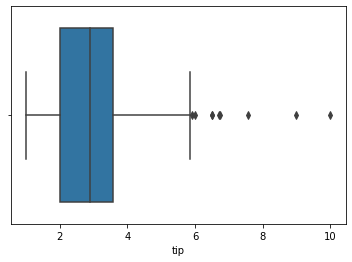

In [16]:
# Visualisatie met boxplot (Seaborn)
sns.boxplot(data = tips,
            y = "tip",
            orient = "h")

In [17]:
# Boxplot (Altair)
alt.Chart(tips).mark_boxplot().encode(
    x=alt.X("tip:Q"))

alt.Chart(...)

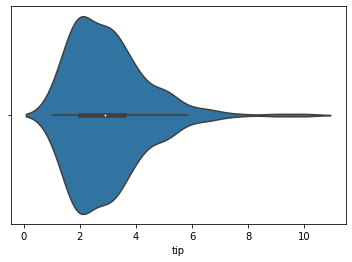

In [18]:
# Violin plot (Seaborn)
sns.violinplot(data = tips,
               y = "tip",
               orient = "h")

Hieronder tonen we een plot van de kansdichteit (kde of kernel density estimation) en histogram. Je kan een van de twee verbergen in de afbeelding door resp. optie `"kde = False"` of `"hist = False"` mee te geven.

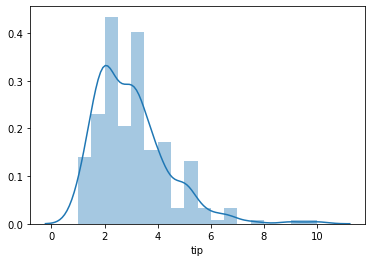

In [19]:
sns.distplot(a = tips["tip"])

Een histogram met Altair. Een kansdichtheidsplot kan niet met Altair.

In [8]:
# Histogram (Altair)
alt.Chart(tips).mark_bar().encode(
    x=alt.X("tip:Q", bin=alt.Bin(extent=[0,11], step=.5)),
    y=alt.Y("count()"))

alt.Chart(...)

### Centrum- en spreidingsmaten

In [9]:
# Centrum- en spreidingsmaten
# Gemiddelde, standaardafwijking & vrienden
print("Gemiddelde:        ", tips["tip"].mean())
print("Standaardafwijking:", tips["tip"].std())
print("Variantie:         ", tips["tip"].var())
print("Scheefheid:        ", tips["tip"].skew())
print("Kurtosis:          ", tips["tip"].kurtosis())

# Mediaan & co
print("Minimum:", tips["tip"].min())
print("Mediaan:", tips["tip"].median())
print("Maximum:", tips["tip"].max())
percentielen = [0.0, 0.25, 0.5, 0.75, 1.0]
print("Percentielen", percentielen, "\n", tips["tip"].quantile(percentielen))
print("Interkwartielafstand:", tips["tip"].quantile(.75) - tips["tip"].quantile(.25))

Gemiddelde:         2.99827868852459
Standaardafwijking: 1.3836381890011822
Variantie:          1.914454638062471
Scheefheid:         1.4654510370979401
Kurtosis:           3.648375873352852
Minimum: 1.0
Mediaan: 2.9
Maximum: 10.0
Percentielen [0.0, 0.25, 0.5, 0.75, 1.0] 
 0.00     1.0000
0.25     2.0000
0.50     2.9000
0.75     3.5625
1.00    10.0000
Name: tip, dtype: float64
Interkwartielafstand: 1.5624999999999996


In [10]:
# Enkele beschrijvende maten:
tips["tip"].describe()

count    244.000000
mean       2.998279
std        1.383638
min        1.000000
25%        2.000000
50%        2.900000
75%        3.562500
max       10.000000
Name: tip, dtype: float64